# Example to load Point Clouds with features
In this example the point clouds and features are loaded.

In [1]:
import os
import torch

# For dispalying the results
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import art3d

# Change the working directory to main directory in order to import the modules.
os.chdir('../')

In [2]:
from src.dataset import FEMGraphDataset, LoadType
from src.utils import load_config

In [3]:
config_file_path = 'config.yaml'

# Get the config  
config = load_config(config_file_path)
dataset_config = config['dataset']
base_dir = dataset_config['base_dir']

# Load the specific data from dataset
# When loading features, only features are available for the 'blank' geometry.
geometries = ['blank', 'punch', 'binder','die'] # Can be any unique subset of this list.
timesteps = [0, 1, 2] #Tiemsteps must be a list of integers. Timesteps available is [0, 1, 2]
load_type = LoadType.NODES_AND_FEATURES


In [4]:
# Access dataset
dataset = FEMGraphDataset(
    base_dir=base_dir,
    geometries=geometries,
    timesteps=timesteps,
    load_type=load_type
)

# Total information
print("Dataset size:", len(dataset))

Dataset size: 5338


# Display the Point Cloud

In [5]:
# Information per simulation.
(parameters, point_clouds, node_indices, features)  = dataset[0]

for geometry, pc in zip(geometries, point_clouds):
    print(f"{geometry} shape: {pc.shape}")

blank shape: torch.Size([3, 11236, 3])
punch shape: torch.Size([3, 1000, 3])
binder shape: torch.Size([3, 127, 3])
die shape: torch.Size([3, 1696, 3])


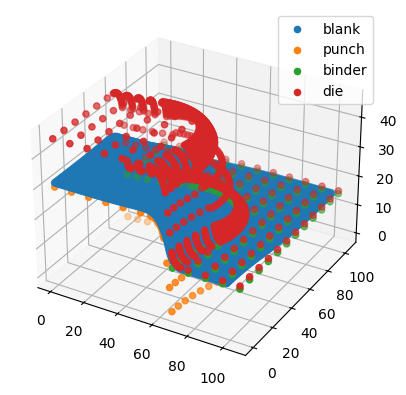

In [6]:
fig = plt.subplot(projection='3d')
timestep = 1

for geometry, pc in zip(geometries, point_clouds):
    
    X, Y, Z = pc[timestep][:,0], pc[timestep][:,1], pc[timestep][:,2]
    fig.scatter3D(X,Y,Z, label=geometry)

plt.legend()
plt.show()

# Display the features

In [36]:
# Information per simulation.
print(f"Node indices shape: {node_indices.shape}") # Node indices are constant over all timesteps
print(f"Features shape: {features.shape}") # Features contain the timestep, nodes, etc.

Node indices shape: torch.Size([22050, 3])
Features shape: torch.Size([3, 22050, 7])


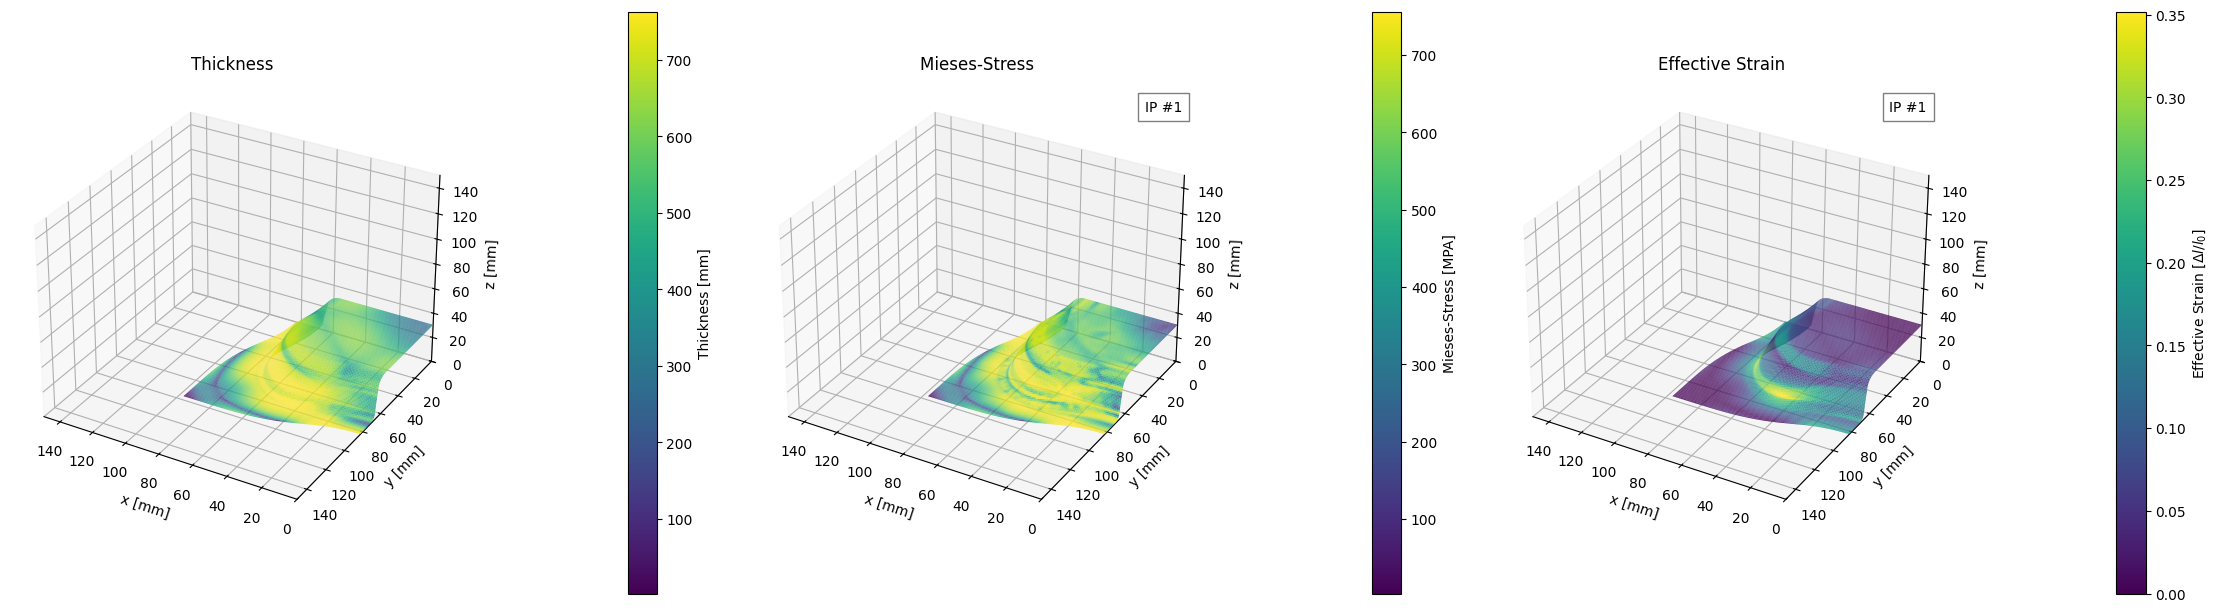

In [ ]:
# Specify variables
timestep = -1

# Integration point of simulation. Define between 0, 1 and 2
ip = 1

f = node_indices
v = point_clouds[0][timestep]

# Assign features
thickness =  features[timestep][:,0]
stress =  features[timestep][:,1+ip]
strain =  features[timestep][:,4+ip]

plotting_information = {'Thickness [mm]':thickness, 'Mieses-Stress [MPA]':stress, 'Effective Strain [$\Delta l / l_0 $]':strain}
annotation = [None, 'IP #' + str(ip), 'IP #' + str(ip)]

fig = plt.figure(figsize=(30,10))

for position, titles, text in zip(range(2), plotting_information, annotation):
    
    info = plotting_information[titles]
    norm = plt.Normalize(info.min(), info.max())
    ax = fig.add_subplot(141+position, projection='3d')
    
    ax.set_title(titles.split('[')[0])
    colors = plt.cm.viridis(norm(info))

    pc = art3d.Poly3DCollection(v[f], facecolors=colors)
    collection = ax.add_collection(pc)

    ax.set_xlim([0,150])
    ax.set_ylim([0,150])
    ax.set_zlim([0, 150])

    ax.set_xlabel('x [mm]')
    ax.set_ylabel('y [mm]')
    ax.set_zlabel('z [mm]')

    ax.view_init(azim=120, elev=30)

    # Create a scalar mappable object
    sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
    fig.colorbar(sm, ax=ax, shrink=0.6, label=titles, pad=0.23)

    # Set annotation
    if text is not None:
        ax.text2D(0.95, 0.95, text, transform=ax.transAxes, ha='right', va='top',
        bbox=dict(facecolor='white', alpha=0.5, pad=5))

plt.tight_layout()
plt.show()